### Financial Engineering 1: Hedging Assignment

In [1]:
# imports
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt

from pyfinance.options import BSM

from scipy.stats import norm

In [2]:
# import data and print head to get rough idea of what is contained
data = pd.read_csv('./fe2.csv')
data.head()

,Unnamed: 0,Date,Underlying,C250,C255,C260,C265,C270,C275,C280,...,P400,P405,P410,P415,P420,P425,P430,P435,P440,P445
0,0,2023-08-21,321.88,77.91,NaN,67.65,NaN,55.00,54.39,49.6,...,77.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2023-08-22,322.46,77.60,NaN,69.55,NaN,NaN,54.27,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2023-08-23,327.00,NaN,NaN,73.20,NaN,NaN,59.00,54.3,...,71.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2023-08-24,319.97,NaN,NaN,66.20,NaN,57.77,60.60,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2023-08-25,322.98,NaN,73.85,64.93,62.29,NaN,NaN,50.3,...,NaN,NaN,NaN,94.03,NaN,NaN,NaN,NaN,NaN,NaN


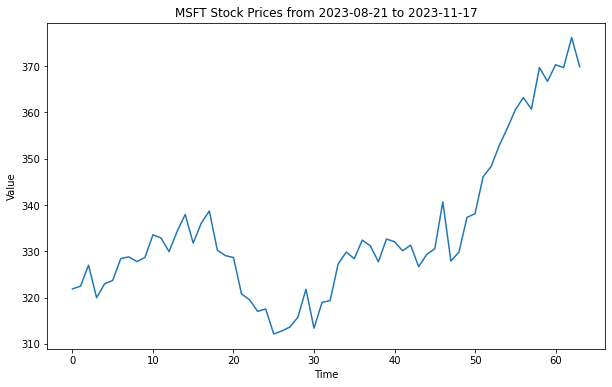

In [3]:
# display underlying stock prices in a chart
fig = plt.figure(figsize=(10,6))
plt.plot(data.index, data['Underlying'])
plt.title(f'MSFT Stock Prices from {data["Date"].min()} to {data["Date"].max()}')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [4]:
# DataFrame with only Call options 

data_call = data[['Date', 'Underlying'] + [col for col in data.columns if col.startswith('C')]]
print(data_call)

          Date  Underlying    C250    C255    C260    C265    C270   C275  \
0   2023-08-21      321.88   77.91     NaN   67.65     NaN   55.00  54.39   
1   2023-08-22      322.46   77.60     NaN   69.55     NaN     NaN  54.27   
2   2023-08-23      327.00     NaN     NaN   73.20     NaN     NaN  59.00   
3   2023-08-24      319.97     NaN     NaN   66.20     NaN   57.77  60.60   
4   2023-08-25      322.98     NaN   73.85   64.93   62.29     NaN    NaN   
..         ...         ...     ...     ...     ...     ...     ...    ...   
59  2023-11-13      366.68  117.53  112.52  107.66     NaN   97.49  92.95   
60  2023-11-14      370.27  119.10  115.84  110.87  105.93   99.25  94.10   
61  2023-11-15      369.67  119.67  114.38  109.36     NaN     NaN    NaN   
62  2023-11-16      376.17     NaN  120.00  115.46  110.62  106.00    NaN   
63  2023-11-17      369.85  121.95     NaN  112.97     NaN     NaN    NaN   

     C280   C285  ...  C400  C405  C410  C415  C420  C425  C430  C435  C440

In [5]:
# DataFrame with only Put options

data_put = data[['Date', 'Underlying'] + [col for col in data.columns if col.startswith('P')]]
print(data_put)

          Date  Underlying  P250  P255  P260  P265  P270  P275  P280  P285  \
0   2023-08-21      321.88  1.41  1.66  1.95  2.34  2.75  3.35  3.95  4.65   
1   2023-08-22      322.46  1.42   NaN  1.94  2.35  2.87  3.25  3.89  4.90   
2   2023-08-23      327.00  1.21  1.37  1.63  1.95  2.27  2.75  3.24  3.85   
3   2023-08-24      319.97  1.54  1.71  2.15   NaN  2.95  3.65  4.40  5.07   
4   2023-08-25      322.98  1.35  1.81  1.72  2.20  2.40  2.87  3.57  4.10   
..         ...         ...   ...   ...   ...   ...   ...   ...   ...   ...   
59  2023-11-13      366.68  0.01   NaN  0.01  0.01  0.01  0.01  0.01  0.01   
60  2023-11-14      370.27  0.01   NaN  0.01   NaN  0.01  0.01  0.01  0.01   
61  2023-11-15      369.67  0.01   NaN   NaN   NaN  0.01  0.01  0.01  0.01   
62  2023-11-16      376.17   NaN   NaN  0.01   NaN   NaN  0.01  0.01  0.01   
63  2023-11-17      369.85   NaN   NaN  0.01   NaN  0.01  0.01  0.01  0.01   

    ...   P400  P405  P410   P415  P420  P425   P430  P435  P44

In [6]:
# Add T column to call_data (remaining days to maturity)

maturity = pd.to_datetime('2023-11-17')

data_call['T'] = maturity - pd.to_datetime(data_call['Date'])
data_call['T'] = data_call['T'].dt.days

# Add r column (interest rate) - for the moment arbitrary fixed
data_call['r'] = 0.05

print(data_call)

          Date  Underlying    C250    C255    C260    C265    C270   C275  \
0   2023-08-21      321.88   77.91     NaN   67.65     NaN   55.00  54.39   
1   2023-08-22      322.46   77.60     NaN   69.55     NaN     NaN  54.27   
2   2023-08-23      327.00     NaN     NaN   73.20     NaN     NaN  59.00   
3   2023-08-24      319.97     NaN     NaN   66.20     NaN   57.77  60.60   
4   2023-08-25      322.98     NaN   73.85   64.93   62.29     NaN    NaN   
..         ...         ...     ...     ...     ...     ...     ...    ...   
59  2023-11-13      366.68  117.53  112.52  107.66     NaN   97.49  92.95   
60  2023-11-14      370.27  119.10  115.84  110.87  105.93   99.25  94.10   
61  2023-11-15      369.67  119.67  114.38  109.36     NaN     NaN    NaN   
62  2023-11-16      376.17     NaN  120.00  115.46  110.62  106.00    NaN   
63  2023-11-17      369.85  121.95     NaN  112.97     NaN     NaN    NaN   

     C280   C285  ...  C410  C415  C420  C425  C430  C435  C440  C445   T  

In [7]:
# Add T column to put_data (remaining days to maturity)

data_put['T'] = maturity - pd.to_datetime(data_put['Date'])
data_put['T'] = data_put['T'].dt.days

# Add r column (interest rate) - for the moment arbitrary fixed
data_put['r'] = 0.05

print(data_put)

          Date  Underlying  P250  P255  P260  P265  P270  P275  P280  P285  \
0   2023-08-21      321.88  1.41  1.66  1.95  2.34  2.75  3.35  3.95  4.65   
1   2023-08-22      322.46  1.42   NaN  1.94  2.35  2.87  3.25  3.89  4.90   
2   2023-08-23      327.00  1.21  1.37  1.63  1.95  2.27  2.75  3.24  3.85   
3   2023-08-24      319.97  1.54  1.71  2.15   NaN  2.95  3.65  4.40  5.07   
4   2023-08-25      322.98  1.35  1.81  1.72  2.20  2.40  2.87  3.57  4.10   
..         ...         ...   ...   ...   ...   ...   ...   ...   ...   ...   
59  2023-11-13      366.68  0.01   NaN  0.01  0.01  0.01  0.01  0.01  0.01   
60  2023-11-14      370.27  0.01   NaN  0.01   NaN  0.01  0.01  0.01  0.01   
61  2023-11-15      369.67  0.01   NaN   NaN   NaN  0.01  0.01  0.01  0.01   
62  2023-11-16      376.17   NaN   NaN  0.01   NaN   NaN  0.01  0.01  0.01   
63  2023-11-17      369.85   NaN   NaN  0.01   NaN  0.01  0.01  0.01  0.01   

    ...  P410   P415  P420  P425   P430  P435  P440  P445   T  

In [8]:
# Strike price should become a variable

# Renaming call option columns to just have a float
columnsC_to_transform = [col for col in data_call.columns if col.startswith('C')]
new_column_namesC = {col: float(col[1:]) for col in columnsC_to_transform}
data_call.rename(columns=new_column_namesC, inplace=True)

data_call.head()

,Date,Underlying,250.0,255.0,260.0,265.0,270.0,275.0,280.0,285.0,...,410.0,415.0,420.0,425.0,430.0,435.0,440.0,445.0,T,r
0,2023-08-21,321.88,77.91,NaN,67.65,NaN,55.00,54.39,49.6,NaN,...,0.88,0.73,0.59,0.52,NaN,0.38,0.33,NaN,88,0.05
1,2023-08-22,322.46,77.60,NaN,69.55,NaN,NaN,54.27,NaN,NaN,...,0.94,NaN,0.67,0.60,0.48,NaN,NaN,NaN,87,0.05
2,2023-08-23,327.00,NaN,NaN,73.20,NaN,NaN,59.00,54.3,NaN,...,1.08,0.94,0.78,0.73,0.64,0.55,NaN,0.37,86,0.05
3,2023-08-24,319.97,NaN,NaN,66.20,NaN,57.77,60.60,50.0,44.62,...,0.91,0.71,0.68,NaN,0.48,NaN,0.33,NaN,85,0.05
4,2023-08-25,322.98,NaN,73.85,64.93,62.29,NaN,NaN,50.3,43.80,...,0.83,NaN,NaN,NaN,0.44,0.38,NaN,0.30,84,0.05


In [9]:
# Renaming put option columns to just have a float
columnsP_to_transform = [col for col in data_put.columns if col.startswith('P')]
new_column_namesP = {col: float(col[1:]) for col in columnsP_to_transform}
data_put.rename(columns=new_column_namesP, inplace=True)

data_put.head()

,Date,Underlying,250.0,255.0,260.0,265.0,270.0,275.0,280.0,285.0,...,410.0,415.0,420.0,425.0,430.0,435.0,440.0,445.0,T,r
0,2023-08-21,321.88,1.41,1.66,1.95,2.34,2.75,3.35,3.95,4.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88,0.05
1,2023-08-22,322.46,1.42,NaN,1.94,2.35,2.87,3.25,3.89,4.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87,0.05
2,2023-08-23,327.00,1.21,1.37,1.63,1.95,2.27,2.75,3.24,3.85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86,0.05
3,2023-08-24,319.97,1.54,1.71,2.15,NaN,2.95,3.65,4.40,5.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85,0.05
4,2023-08-25,322.98,1.35,1.81,1.72,2.20,2.40,2.87,3.57,4.10,...,NaN,94.03,NaN,NaN,NaN,NaN,NaN,NaN,84,0.05


In [10]:
# Now we can use melt function so that the strike price becomes a variable
data_call = data_call.melt(id_vars=['Underlying', 'Date', 'T', 'r'], var_name="E").dropna()

# We rename the Call option price to Cobs
data_call.rename({'value':'Cobs'}, axis='columns', inplace=True)

print(data_call)

      Underlying        Date   T     r      E   Cobs
0         321.88  2023-08-21  88  0.05  250.0  77.91
1         322.46  2023-08-22  87  0.05  250.0  77.60
10        333.55  2023-09-05  73  0.05  250.0  86.25
12        329.91  2023-09-07  71  0.05  250.0  84.95
13        334.27  2023-09-08  70  0.05  250.0  89.20
...          ...         ...  ..   ...    ...    ...
2532      332.42  2023-10-11  37  0.05  445.0   0.02
2541      330.53  2023-10-24  24  0.05  445.0   0.01
2547      346.07  2023-11-01  16  0.05  445.0   0.01
2551      360.53  2023-11-07  10  0.05  445.0   0.01
2554      369.67  2023-11-10   7  0.05  445.0   0.01

[2102 rows x 6 columns]


In [11]:
# Melt function for data_put 
data_put = data_put.melt(id_vars=['Underlying', 'Date', 'T', 'r'], var_name="E").dropna()

# We rename the Put option price to Pobs
data_put.rename({'value':'Pobs'}, axis='columns', inplace=True)

print(data_put)

      Underlying        Date   T     r      E    Pobs
0        321.880  2023-08-21  88  0.05  250.0    1.41
1        322.460  2023-08-22  87  0.05  250.0    1.42
2        327.000  2023-08-23  86  0.05  250.0    1.21
3        319.970  2023-08-24  85  0.05  250.0    1.54
4        322.980  2023-08-25  84  0.05  250.0    1.35
...          ...         ...  ..   ...    ...     ...
2483     346.070  2023-11-01  16  0.05  440.0   96.35
2503     328.790  2023-08-30  79  0.05  445.0  116.83
2512     336.060  2023-09-13  65  0.05  445.0  108.54
2515     329.060  2023-09-18  60  0.05  445.0  115.81
2527     318.955  2023-10-04  44  0.05  445.0  126.65

[1660 rows x 6 columns]


In [12]:
# # Scaling variables of data_call
data_call['r'] = data_call['r'] / 100
data_call['T'] = data_call['T'] / 252
data_call['Underlying'] = data_call['Underlying'] / 1000
data_call['E'] = data_call['E'] / 1000
data_call['Cobs'] = data_call['Cobs'] / 1000

In [13]:
# Computing volatility for each option price 
data_call['volatility'] = data_call.apply(lambda row:  BSM(kind='call', S0=row['Underlying'], K=row['E'], T= row['T'], r=row['r'], sigma=0.1).implied_vol(value = row['Cobs']) if row['T'] != 0 else np.nan, axis = 1)
print(data_call)

C:\Users\ayman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pyfinance\options.py:242: RuntimeWarning: divide by zero encountered in scalar divide
  vol = vol + diff / opt.vega()
C:\Users\ayman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pyfinance\options.py:149: RuntimeWarning: invalid value encountered in scalar divide
  self.d1 = (
C:\Users\ayman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pyfinance\options.py:151: RuntimeWarning: overflow encountered in scalar power
  + (self.r + 0.5 * self.sigma ** 2) * self.T
C:\Users\ayman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pyfinance\options.py:242: RuntimeWarning: overflow encountered in scalar divide
  vol = vol + diff / opt.vega(

      Underlying        Date         T       r      E     Cobs  volatility
0        0.32188  2023-08-21  0.349206  0.0005   0.25  0.07791    0.428956
1        0.32246  2023-08-22  0.345238  0.0005   0.25  0.07760    0.410466
10       0.33355  2023-09-05  0.289683  0.0005   0.25  0.08625    0.403011
12       0.32991  2023-09-07  0.281746  0.0005   0.25  0.08495    0.477105
13       0.33427  2023-09-08  0.277778  0.0005   0.25  0.08920    0.491641
...          ...         ...       ...     ...    ...      ...         ...
2532     0.33242  2023-10-11  0.146825  0.0005  0.445  0.00002         NaN
2541     0.33053  2023-10-24  0.095238  0.0005  0.445  0.00001         NaN
2547     0.34607  2023-11-01  0.063492  0.0005  0.445  0.00001         NaN
2551     0.36053  2023-11-07  0.039683  0.0005  0.445  0.00001         NaN
2554     0.36967  2023-11-10  0.027778  0.0005  0.445  0.00001         NaN

[2102 rows x 7 columns]


In [14]:
# Scaling variables of data_put
data_put['r'] = data_put['r'] / 100
data_put['T'] = data_put['T'] / 252
data_put['Underlying'] = data_put['Underlying'] / 1000
data_put['E'] = data_put['E'] / 1000
data_put['Pobs'] = data_put['Pobs'] / 1000

In [15]:

# Computing volatility for each option price 
data_put['volatility'] = data_put.apply(lambda row:  BSM(kind='put', S0=row['Underlying'], K=row['E'], T= row['T'], r=row['r'], sigma=0.1).implied_vol(value = row['Pobs']) if row['T'] != 0 else np.nan, axis = 1)
print(data_put)


C:\Users\ayman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pyfinance\options.py:242: RuntimeWarning: divide by zero encountered in scalar divide
  vol = vol + diff / opt.vega()
C:\Users\ayman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pyfinance\options.py:149: RuntimeWarning: invalid value encountered in scalar divide
  self.d1 = (
C:\Users\ayman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pyfinance\options.py:151: RuntimeWarning: overflow encountered in scalar power
  + (self.r + 0.5 * self.sigma ** 2) * self.T
C:\Users\ayman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pyfinance\options.py:242: RuntimeWarning: overflow encountered in scalar divide
  vol = vol + diff / opt.vega(

      Underlying        Date         T       r      E     Pobs  volatility
0       0.321880  2023-08-21  0.349206  0.0005   0.25  0.00141         NaN
1       0.322460  2023-08-22  0.345238  0.0005   0.25  0.00142         NaN
2       0.327000  2023-08-23  0.341270  0.0005   0.25  0.00121         NaN
3       0.319970  2023-08-24  0.337302  0.0005   0.25  0.00154         NaN
4       0.322980  2023-08-25  0.333333  0.0005   0.25  0.00135         NaN
...          ...         ...       ...     ...    ...      ...         ...
2483    0.346070  2023-11-01  0.063492  0.0005   0.44  0.09635    0.679706
2503    0.328790  2023-08-30  0.313492  0.0005  0.445  0.11683    0.285650
2512    0.336060  2023-09-13  0.257937  0.0005  0.445  0.10854         NaN
2515    0.329060  2023-09-18  0.238095  0.0005  0.445  0.11581         NaN
2527    0.318955  2023-10-04  0.174603  0.0005  0.445  0.12665    0.410925

[1660 rows x 7 columns]


In [16]:
# Filtering unwanted volatilities for data_call, i.e. volatility smaller than zero and larger than 0.6

data_call = data_call[(data_call['volatility'] < 0.6) & (data_call['volatility'] > 0.0)]
print(data_call)

      Underlying        Date         T       r      E     Cobs  volatility
0        0.32188  2023-08-21  0.349206  0.0005   0.25  0.07791    0.428956
1        0.32246  2023-08-22  0.345238  0.0005   0.25  0.07760    0.410466
10       0.33355  2023-09-05  0.289683  0.0005   0.25  0.08625    0.403011
12       0.32991  2023-09-07  0.281746  0.0005   0.25  0.08495    0.477105
13       0.33427  2023-09-08  0.277778  0.0005   0.25  0.08920    0.491641
...          ...         ...       ...     ...    ...      ...         ...
1659     0.36668  2023-11-13  0.015873  0.0005  0.375  0.00105    0.208163
1660     0.37027  2023-11-14  0.011905  0.0005  0.375  0.00147    0.204121
1661     0.36967  2023-11-15  0.007937  0.0005  0.375  0.00080    0.200746
1662     0.37617  2023-11-16  0.003968  0.0005  0.375  0.00246    0.192709
1726     0.37617  2023-11-16  0.003968  0.0005   0.38  0.00052    0.192845

[1009 rows x 7 columns]


In [17]:
# Filtering unwanted volatilities for data_put, i.e. volatility smaller than zero and larger than 0.6

data_put = data_put[(data_put['volatility'] < 0.6) & (data_put['volatility'] > 0.0)]
print(data_put)

      Underlying        Date         T       r      E     Pobs  volatility
473     0.312140  2023-09-26  0.206349  0.0005  0.285  0.00455    0.262500
474     0.312790  2023-09-27  0.202381  0.0005  0.285  0.00415    0.258331
478     0.313390  2023-10-03  0.178571  0.0005  0.285  0.00412    0.277207
512     0.321880  2023-08-21  0.349206  0.0005   0.29  0.00560    0.236202
513     0.322460  2023-08-22  0.345238  0.0005   0.29  0.00570    0.241622
...          ...         ...       ...     ...    ...      ...         ...
2208    0.319360  2023-10-05  0.170635  0.0005   0.42  0.10133    0.363283
2309    0.323700  2023-08-28  0.321429  0.0005   0.43  0.10724    0.288096
2443    0.332880  2023-09-06  0.285714  0.0005   0.44  0.10841    0.317301
2503    0.328790  2023-08-30  0.313492  0.0005  0.445  0.11683    0.285650
2527    0.318955  2023-10-04  0.174603  0.0005  0.445  0.12665    0.410925

[781 rows x 7 columns]


In [18]:
# Function to calculate Delta (Nd1)
# def calculate_Nd1(row):
#     S, E, r, sigma, T = row['Underlying'], row['E'], row['r'], row['volatility'], row['T']

#     d1 = (np.log(S/E) + (r + sigma ** 2 / 2) * (T)) / (sigma * np.sqrt(T) + 1e-8)  # Adding a small epsilon to avoid division by zero
#     Nd1 = norm.cdf(d1)

#     return Nd1

# Adding new column Delta, Vega and Gamma to data_call
data_call['Delta'] = data_call.apply(lambda row:  BSM(kind='call', S0=row['Underlying'], K=row['E'], T= row['T'], r=row['r'], sigma=row['volatility']).delta(), axis = 1)
data_call['Vega'] = data_call.apply(lambda row:  BSM(kind='call', S0=row['Underlying'], K=row['E'], T= row['T'], r=row['r'], sigma=row['volatility']).vega(), axis = 1)
data_call['Gamma'] = data_call.apply(lambda row:  BSM(kind='call', S0=row['Underlying'], K=row['E'], T= row['T'], r=row['r'], sigma=row['volatility']).gamma(), axis = 1)

# data1['Delta'] = data1.apply(calculate_Nd1, axis=1)
print(data_call)

# To have a complete picture of what is in data_call
data_call.to_csv('data_call.csv', index=False)


      Underlying        Date         T       r      E     Cobs  volatility  \
0        0.32188  2023-08-21  0.349206  0.0005   0.25  0.07791    0.428956   
1        0.32246  2023-08-22  0.345238  0.0005   0.25  0.07760    0.410466   
10       0.33355  2023-09-05  0.289683  0.0005   0.25  0.08625    0.403011   
12       0.32991  2023-09-07  0.281746  0.0005   0.25  0.08495    0.477105   
13       0.33427  2023-09-08  0.277778  0.0005   0.25  0.08920    0.491641   
...          ...         ...       ...     ...    ...      ...         ...   
1659     0.36668  2023-11-13  0.015873  0.0005  0.375  0.00105    0.208163   
1660     0.37027  2023-11-14  0.011905  0.0005  0.375  0.00147    0.204121   
1661     0.36967  2023-11-15  0.007937  0.0005  0.375  0.00080    0.200746   
1662     0.37617  2023-11-16  0.003968  0.0005  0.375  0.00246    0.192709   
1726     0.37617  2023-11-16  0.003968  0.0005   0.38  0.00052    0.192845   

         Delta      Vega      Gamma  
0     0.869579  0.040328 

In [19]:
# Adding new column Delta, Vega and Gamma to data_put
data_put['Delta'] = data_put.apply(lambda row:  BSM(kind='put', S0=row['Underlying'], K=row['E'], T= row['T'], r=row['r'], sigma=row['volatility']).delta(), axis = 1)
data_put['Vega'] = data_put.apply(lambda row:  BSM(kind='put', S0=row['Underlying'], K=row['E'], T= row['T'], r=row['r'], sigma=row['volatility']).vega(), axis = 1)
data_put['Gamma'] = data_put.apply(lambda row:  BSM(kind='put', S0=row['Underlying'], K=row['E'], T= row['T'], r=row['r'], sigma=row['volatility']).gamma(), axis = 1)

# data1['Delta'] = data1.apply(calculate_Nd1, axis=1)
print(data_put)

# To have a complete picture of what is in data_call
data_put.to_csv('data_put.csv', index=False)


      Underlying        Date         T       r      E     Pobs  volatility  \
473     0.312140  2023-09-26  0.206349  0.0005  0.285  0.00455    0.262500   
474     0.312790  2023-09-27  0.202381  0.0005  0.285  0.00415    0.258331   
478     0.313390  2023-10-03  0.178571  0.0005  0.285  0.00412    0.277207   
512     0.321880  2023-08-21  0.349206  0.0005   0.29  0.00560    0.236202   
513     0.322460  2023-08-22  0.345238  0.0005   0.29  0.00570    0.241622   
...          ...         ...       ...     ...    ...      ...         ...   
2208    0.319360  2023-10-05  0.170635  0.0005   0.42  0.10133    0.363283   
2309    0.323700  2023-08-28  0.321429  0.0005   0.43  0.10724    0.288096   
2443    0.332880  2023-09-06  0.285714  0.0005   0.44  0.10841    0.317301   
2503    0.328790  2023-08-30  0.313492  0.0005  0.445  0.11683    0.285650   
2527    0.318955  2023-10-04  0.174603  0.0005  0.445  0.12665    0.410925   

         Delta      Vega     Gamma  
473  -0.205162  0.040306  

In [20]:
# Start date for hedging, 45 days before last data point in dataframe
start_date = pd.to_datetime('2023-11-17') - pd.DateOffset(45)
print(start_date)

# Find the call option price with delta value that is closest to 0.5 on the start date, to get the ATM option
filtered_rows = data_call[pd.to_datetime(data_call['Date']) == start_date]
atm_call = filtered_rows.loc[(filtered_rows['Delta'] - 0.5).abs().idxmin()]
option_price, strike, delta, date = atm_call['Cobs'], atm_call['E'], atm_call['Delta'], atm_call['Date']
print(f"Atm: Call option price with Start date = {date}, Delta = {delta}, Option price = {option_price}, Strike = {strike}")


2023-10-03 00:00:00
Atm: Call option price with Start date = 2023-10-03, Delta = 0.5046244203100226, Option price = 0.01333, Strike = 0.315


In [21]:
portfolio_value = atm_call['Cobs']
portfolio_delta = atm_call['Delta']
print(f'Portfolio Value: {portfolio_value}, Portfolio Delta: {portfolio_delta}')
replicating_portfolio_delta = -1*portfolio_delta
replicating_porfolio_value = replicating_portfolio_delta*data_call[pd.to_datetime(pd.to_datetime(data_call['Date'])) == start_date]['Underlying'].to_numpy()[0]
print(f'Current shares in replicating portfolio: 0')
if (portfolio_delta > 0) :
    print(f'Sell {portfolio_delta} shares to hedge portfolio')
else:
    print(f'Buy {abs(portfolio_delta)} shares to hedge portfolio')
print(f'Replicating Portfolio Value: {replicating_porfolio_value}, Replicating Portfolio Delta: {replicating_portfolio_delta}')
print(f'Total Portfolio Value: {portfolio_value + replicating_porfolio_value}, Total Portfolio Delta: {portfolio_delta + replicating_portfolio_delta}')

Portfolio Value: 0.01333, Portfolio Delta: 0.5046244203100226
Current shares in replicating portfolio: 0
Sell 0.5046244203100226 shares to hedge portfolio
Replicating Portfolio Value: -0.158144247080958, Replicating Portfolio Delta: -0.5046244203100226
Total Portfolio Value: -0.144814247080958, Total Portfolio Delta: 0.0


In [22]:
next_day = start_date + pd.DateOffset(3)
new_portfolio_value = data_call[(pd.to_datetime(data_call['Date']) == next_day) & (data_call['E'] == atm_call['E'])]['Cobs'].to_numpy()[0]
new_portfolio_delta = data_call[(pd.to_datetime(data_call['Date']) == next_day) & (data_call['E'] == atm_call['E'])]['Delta'].to_numpy()[0]
print(f'Portfolio Value: {new_portfolio_value}, Portfolio Delta: {new_portfolio_delta}')
new_replicating_portfolio_delta = -1*new_portfolio_delta
new_replicating_porfolio_value = new_replicating_portfolio_delta*data_call[pd.to_datetime(pd.to_datetime(data_call['Date'])) == next_day]['Underlying'].to_numpy()[0]
print(f'Current shares in replicating portfolio: {portfolio_value}')
if ((new_portfolio_delta - portfolio_delta) > 0) :
    print(f'Sell {new_portfolio_delta - portfolio_delta} shares to hedge portfolio')
else:
    print(f'Buy {abs(new_portfolio_delta - portfolio_delta)} shares to hedge portfolio')
print(f'Replicating Portfolio Value: {new_replicating_porfolio_value}, Replicating Portfolio Delta: {new_replicating_portfolio_delta}')
print(f'Total Portfolio Value: {new_portfolio_value + new_replicating_porfolio_value}, Total Portfolio Delta: {new_portfolio_delta + new_replicating_portfolio_delta}')

Portfolio Value: 0.0206, Portfolio Delta: 0.6604736157536861
Current shares in replicating portfolio: 0.01333
Sell 0.1558491954436635 shares to hedge portfolio
Replicating Portfolio Value: -0.21614659549155132, Replicating Portfolio Delta: -0.6604736157536861
Total Portfolio Value: -0.19554659549155132, Total Portfolio Delta: 0.0


In [38]:
def get_option_portfolio_values(portfolio, start_date, end_date, all_options, call_options, put_options):
    portfolio_values = {date: np.NaN for date in all_options.loc[(all_options['Date'] >= start_date) & (all_options['Date'] <= end_date), 'Date']}

    for option, quantity, buy_sell in portfolio:
        option_type = option[0]
        option_strike = float(option[1:])

        if(option_type == 'C'):
            options_data = call_options
            option_price_column = 'Cobs'
        else:
            options_data = put_options
            option_price_column = 'Pobs'

        for index, row in options_data[(options_data['Date'] >= start_date) & (options_data['Date'] <= end_date) & (options_data['E'] == (option_strike/1000))].iterrows():              
            if (np.isnan(portfolio_values[row['Date']])):
                portfolio_values[row['Date']] = 0
            
            if buy_sell == 'buy':
                portfolio_values[row['Date']] += (row[option_price_column] * quantity)
            else:
                portfolio_values[row['Date']] -= (row[option_price_column] * quantity)

    sorted_portfolio_values = dict(sorted(portfolio_values.items()))
                
    return np.array(list(sorted_portfolio_values.values()))

def get_values(ticker, start_date, end_date, all_options, call_options, put_options):
    values = {date: np.NaN for date in all_options.loc[(all_options['Date'] >= start_date) & (all_options['Date'] <= end_date), 'Date']}

    options_data = all_options

    if(ticker == 'Underlying'):
        for index, row in options_data[(options_data['Date'] >= start_date) & (options_data['Date'] <= end_date)].iterrows():
            values[row['Date']] = row['Underlying']
        sorted_values = dict(sorted(values.items()))
        return np.array(list(sorted_values.values()))

    if(ticker[0] == 'C'):
        options_data = call_options
        option_price_column = 'Cobs'
    elif(ticker[0] == 'P'):
        options_data = put_options
        option_price_column = 'Pobs'

    option_strike = float(ticker[1:])

    for index, row in options_data[(options_data['Date'] >= start_date) & (options_data['Date'] <= end_date) & (options_data['E'] == (option_strike/1000))].iterrows():       
        values[row['Date']] = row[option_price_column]

    sorted_values = dict(sorted(values.items()))
        
    return np.array(list(sorted_values.values()))

def get_delta_values(portfolio, start_date, end_date, all_options, call_options, put_options):
    delta_values = {date: np.NaN for date in all_options.loc[(all_options['Date'] >= start_date) & (all_options['Date'] <= end_date), 'Date']}

    for option, quantity, buy_sell in portfolio:
        option_type = option[0]
        option_strike = float(option[1:])

        if(option_type == 'C'):
            options_data = call_options
        else:
            options_data = put_options

        for index, row in options_data[(options_data['Date'] >= start_date) & (options_data['Date'] <= end_date) & (options_data['E'] == (option_strike/1000))].iterrows():         
            if (np.isnan(delta_values[row['Date']])):
                delta_values[row['Date']] = 0
            
            if buy_sell == 'buy':
                delta_values[row['Date']] += (row['Delta'] * quantity)
            else:
                delta_values[row['Date']] -= (row['Delta'] * quantity)

    sorted_delta_values = dict(sorted(delta_values.items()))

    return np.array(list(sorted_delta_values.values()))

def get_vega_values(portfolio, start_date, end_date, all_options, call_options, put_options):
    vega_values = {date: np.NaN for date in all_options.loc[(all_options['Date'] >= start_date) & (all_options['Date'] <= end_date), 'Date']}

    for option, quantity, buy_sell in portfolio:
        option_type = option[0]
        option_strike = float(option[1:])

        if(option_type == 'C'):
            options_data = call_options
        else:
            options_data = put_options

        for index, row in options_data[(options_data['Date'] >= start_date) & (options_data['Date'] <= end_date) & (options_data['E'] == (option_strike/1000))].iterrows():
            if np.isnan(row['Vega']):
                vega_values[row['Date']] = np.NaN
            
            if (np.isnan(vega_values[row['Date']])):
                vega_values[row['Date']] = 0
            
            if buy_sell == 'buy':
                vega_values[row['Date']] += (row['Vega'] * quantity)
            else:
                vega_values[row['Date']] -= (row['Vega'] * quantity)

    sorted_vega_values = dict(sorted(vega_values.items()))

    return np.array(list(sorted_vega_values.values()))

def delta_hedge(hedging_frequency, portfolio_values, underlying_values, delta_values):
    if hedging_frequency <= 0 or hedging_frequency >= len(delta_values):
        return False
    
    portfolio_value = portfolio_values[0]
    underlying_value = underlying_values[0]
    delta = delta_values[0]
    accuracies = []

    missing_data = 0

    for i in range(hedging_frequency, len(delta_values), hedging_frequency):
        if(not(np.isnan(portfolio_values[i]) or np.isnan(portfolio_value) or np.isnan(underlying_value) or np.isnan(underlying_values[i]) or np.isnan(delta))):
            accuracy = (portfolio_values[i] - portfolio_value) - (underlying_values[i] - underlying_value) * delta
            accuracies.append(accuracy)
            portfolio_value = portfolio_values[i]
            underlying_value = underlying_values[i]
            delta = delta_values[i]
        else:
            missing_data += 1

    print(f'{missing_data} missing data were detected during the hedging.')

    mean_squared_error = sum([num**2 for num in accuracies]) / len(accuracies)

    return {
        'accuracies': accuracies,
        'mean_squered_error': mean_squared_error
    }

def option_portfolio_delta_hedging(portfolio, start_date, end_date, hedging_frequency, all_options, call_options, put_options):
    # portfolio example: [['C250', 2, 'buy'], ['P400', 1, 'sell']]

    portfolio_values = get_option_portfolio_values(portfolio, start_date, end_date, all_options, call_options, put_options)
    underlying_values = get_values('Underlying', start_date, end_date, all_options, call_options, put_options)
    delta_values = get_delta_values(portfolio, start_date, end_date, all_options, call_options, put_options)

    # print(portfolio_values)
    # print(underlying_values)
    # print(delta_values)

    # print(len(portfolio_values))
    # print(len(underlying_values))
    # print(len(delta_values))

    hedging_results = delta_hedge(hedging_frequency, portfolio_values, underlying_values, delta_values)
    return hedging_results

def solve_2_by_2_linear_system(equation_one, equation_two):
    # equations of the form ax + by = c, dx + ey = f
    a, b, c = equation_one
    d, e, f = equation_two

    x = (b * f - e * c) / (b * d - a * e)
    y = (c - a * x) / b

    return (x, y)

def delta_vega_hedge(hedging_frequency, portfolio_values, portfolio_delta_values, portfolio_vega_values, sec_one_values, sec_one_delta_values, 
                        sec_one_vega_values, sec_two_values, sec_two_delta_values, sec_two_vega_values):

    portfolio_value = portfolio_values[0]
    portfolio_delta= portfolio_delta_values[0]
    portfolio_vega = portfolio_vega_values[0]
    sec_one = sec_one_values[0]
    sec_one_delta = sec_one_delta_values[0]
    sec_one_vega = sec_one_vega_values[0]
    sec_two = sec_two_values[0]
    sec_two_delta = sec_two_delta_values[0]
    sec_two_vega = sec_two_vega_values[0]
    sec_one_amount, sec_two_amount = solve_2_by_2_linear_system([sec_one_delta, sec_two_delta, -portfolio_delta], 
                                                                    [sec_one_vega, sec_two_vega, -portfolio_vega])
    accuracies = []

    for i in range(hedging_frequency, len(sec_two_delta_values), hedging_frequency):
        change_in_portfolio = portfolio_values[i] - portfolio_value
        change_in_replication = sec_one_amount * (sec_one_values[i] - sec_one) + sec_two_amount * (sec_two_values[i] - sec_two)
        accuracy = change_in_portfolio - change_in_replication
        accuracies.append(accuracy)
        portfolio_value = portfolio_values[i]
        portfolio_delta= portfolio_delta_values[i]
        portfolio_vega = portfolio_vega_values[i]
        sec_one = sec_one_values[i]
        sec_one_delta = sec_one_delta_values[i]
        sec_one_vega = sec_one_vega_values[i]
        sec_two = sec_two_values[i]
        sec_two_delta = sec_two_delta_values[i]
        sec_two_vega = sec_two_vega_values[i]
        sec_one_amount, sec_two_amount = solve_2_by_2_linear_system([sec_one_delta, sec_two_delta, -portfolio_delta], 
                                                                        [sec_one_vega, sec_two_vega, -portfolio_vega])

    mean_squared_error = sum([num**2 for num in accuracies]) / len(accuracies)

    return {
        'accuracies': accuracies,
        'mean_squered_error': mean_squared_error
    }

def option_portfolio_delta_vega_hedging(portfolio, security_one, security_two, start_date, end_date, hedging_frequency, all_options, call_options, put_options):
    # portfolio example: [['C250', 2, 'buy'], ['P400', 1, 'sell']]

    portfolio_values = get_option_portfolio_values(portfolio, start_date, end_date, all_options, call_options, put_options)
    portfolio_delta_values = get_delta_values(portfolio, start_date, end_date, all_options, call_options, put_options)
    portfolio_vega_values = get_vega_values(portfolio, start_date, end_date, all_options, call_options, put_options)
    sec_one_values = get_values(security_one, start_date, end_date, all_options, call_options, put_options)
    sec_one_delta_values = get_delta_values([[security_one, 1, 'buy']], start_date, end_date, all_options, call_options, put_options)
    sec_one_vega_values = get_vega_values([[security_one, 1, 'buy']], start_date, end_date, all_options, call_options, put_options)
    sec_two_values = get_values(security_two, start_date, end_date, all_options, call_options, put_options)
    sec_two_delta_values = get_delta_values([[security_two, 1, 'buy']], start_date, end_date, all_options, call_options, put_options)
    sec_two_vega_values = get_vega_values([[security_two, 1, 'buy']], start_date, end_date, all_options, call_options, put_options)
    
    hedging_results = delta_vega_hedge(hedging_frequency, portfolio_values, portfolio_delta_values, portfolio_vega_values, sec_one_values, 
                                            sec_one_delta_values, sec_one_vega_values, sec_two_values, sec_two_delta_values, sec_two_vega_values)
    return hedging_results

In [24]:
results = option_portfolio_delta_hedging([['C330', 1, 'buy']], '2023-10-5', '2023-11-17', 1, data, data_call, data_put)
print(results)

5 missing data were detected during the hedging.
{'accuracies': [-1.7638452598464327, -3.7203929216801828, -3.262704293769244, -3.8262917642196737, -0.1495371660160859, -8.325781343882472, 2.936283434235507], 'mean_squered_error': 17.171568331744815}


In [25]:
# Update T, volatily, delta, gamma and vega based on expiration date
def update_greeks_and_T_based_on_expiration_date(expiration_date, call_options, put_options):
    call_options['T'] = pd.to_datetime(expiration_date) - pd.to_datetime(call_options['Date'])
    call_options['T'] = call_options['T'].dt.days
    call_options['T'] = call_options['T'] / 252

    put_options['T'] = pd.to_datetime(expiration_date) - pd.to_datetime(put_options['Date'])
    put_options['T'] = put_options['T'].dt.days
    put_options['T'] = put_options['T'] / 252

    call_options['volatility'] = call_options.apply(lambda row:  BSM(kind='call', S0=row['Underlying'], K=row['E'], T= row['T'], r=row['r'], sigma=0.1).implied_vol(value = row['Cobs']) if row['T'] != 0 else np.nan, axis = 1)
    call_options['Delta'] = call_options.apply(lambda row:  BSM(kind='call', S0=row['Underlying'], K=row['E'], T= row['T'], r=row['r'], sigma=row['volatility']).delta(), axis = 1)
    call_options['Vega'] = call_options.apply(lambda row:  BSM(kind='call', S0=row['Underlying'], K=row['E'], T= row['T'], r=row['r'], sigma=row['volatility']).vega(), axis = 1)
    call_options['Gamma'] = call_options.apply(lambda row:  BSM(kind='call', S0=row['Underlying'], K=row['E'], T= row['T'], r=row['r'], sigma=row['volatility']).gamma(), axis = 1)

    put_options['volatility'] = put_options.apply(lambda row:  BSM(kind='put', S0=row['Underlying'], K=row['E'], T= row['T'], r=row['r'], sigma=0.1).implied_vol(value = row['Pobs']) if row['T'] != 0 else np.nan, axis = 1)
    put_options['Delta'] = put_options.apply(lambda row:  BSM(kind='put', S0=row['Underlying'], K=row['E'], T= row['T'], r=row['r'], sigma=row['volatility']).delta(), axis = 1)
    put_options['Vega'] = put_options.apply(lambda row:  BSM(kind='put', S0=row['Underlying'], K=row['E'], T= row['T'], r=row['r'], sigma=row['volatility']).vega(), axis = 1)
    put_options['Gamma'] = put_options.apply(lambda row:  BSM(kind='put', S0=row['Underlying'], K=row['E'], T= row['T'], r=row['r'], sigma=row['volatility']).gamma(), axis = 1)


In [26]:
def get_atm_call_price(date, call_options):
    # Find the call option price with delta value that is closest to 0.5 on the start date, to get the ATM option
    filtered_rows = call_options[pd.to_datetime(data_call['Date']) == date]
    atm_call = filtered_rows.loc[(filtered_rows['Delta'] - 0.5).abs().idxmin()]
    strike = atm_call['E']
    return strike*1000

In [27]:
def get_atm_put_price(date, put_options):
    # Find the call option price with delta value that is closest to 0.5 on the start date, to get the ATM option
    filtered_rows = put_options[pd.to_datetime(data_call['Date']) == date]
    atm_call = filtered_rows.loc[(filtered_rows['Delta'] - 0.5).abs().idxmin()]
    strike = atm_call['E']
    return strike*1000

In [28]:
# Impact of changing Hedging frequency on the accuracy of Delta Hedging 
# Fixed variables: Time to maturity = 45 days, ATM call price

def testing_multiple_hedging_frequencies(all_options, call_options, put_options):
    mean_errors = []
    # Testing hedging frequency 1 day, 2 days ... 10 days
    iteration_hedging_frequencies = np.arange(1, 11)

    for iteration_hedging_frequency in iteration_hedging_frequencies:
        errors = [] 
        # 10 different expirations date for statistical results
        for iteration_expiration_date in range(10):
            expiration_date = all_options.at[all_options[all_options['Date'] == '2023-11-17'].index[0] - iteration_expiration_date*2, 'Date']

            # print(expiration_date)
            update_greeks_and_T_based_on_expiration_date(expiration_date, call_options, put_options)

            start_date = all_options.at[all_options[all_options['Date'] == expiration_date].index[0] - 45, 'Date']
            # print(start_date)

            atm_call_price = get_atm_call_price(start_date, call_options)

            # print('C'+str(int(atm_call_price)))

            result = option_portfolio_delta_hedging([['C'+str(int(atm_call_price)), 1, 'buy']], start_date, expiration_date, iteration_hedging_frequency, all_options, call_options, put_options)
            errors.append(result['mean_squered_error'])

        mean_errors.append(np.mean(errors))

    # Plotting
    plt.plot(iteration_hedging_frequencies, mean_errors, marker='o')
    plt.xlabel('Hedging Frequency (Days)')
    plt.ylabel('Mean Squared Error')
    plt.title('Mean Squared Error vs. Hedging Frequency')
    plt.show()


5 missing data were detected during the hedging.


C:\Users\ayman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pyfinance\options.py:152: RuntimeWarning: invalid value encountered in sqrt
  ) / (self.sigma * np.sqrt(self.T))
C:\Users\ayman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pyfinance\options.py:153: RuntimeWarning: invalid value encountered in sqrt
  self.d2 = self.d1 - self.sigma * np.sqrt(self.T)
C:\Users\ayman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pyfinance\options.py:229: RuntimeWarning: invalid value encountered in sqrt
  vol = np.sqrt(2.0 * np.pi / self.T) * (value / self.S0)
C:\Users\ayman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pyfinance\options.py:189: RuntimeWarning: invalid value encountered in sqrt
  

2 missing data were detected during the hedging.


C:\Users\ayman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pyfinance\options.py:242: RuntimeWarning: divide by zero encountered in scalar divide
  vol = vol + diff / opt.vega()
C:\Users\ayman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pyfinance\options.py:149: RuntimeWarning: invalid value encountered in scalar divide
  self.d1 = (


0 missing data were detected during the hedging.
1 missing data were detected during the hedging.
0 missing data were detected during the hedging.


C:\Users\ayman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pyfinance\options.py:151: RuntimeWarning: overflow encountered in scalar power
  + (self.r + 0.5 * self.sigma ** 2) * self.T


0 missing data were detected during the hedging.
0 missing data were detected during the hedging.
0 missing data were detected during the hedging.
0 missing data were detected during the hedging.
0 missing data were detected during the hedging.
3 missing data were detected during the hedging.
1 missing data were detected during the hedging.
0 missing data were detected during the hedging.
1 missing data were detected during the hedging.
0 missing data were detected during the hedging.
0 missing data were detected during the hedging.
0 missing data were detected during the hedging.
0 missing data were detected during the hedging.
0 missing data were detected during the hedging.
0 missing data were detected during the hedging.
2 missing data were detected during the hedging.
1 missing data were detected during the hedging.
0 missing data were detected during the hedging.
0 missing data were detected during the hedging.
0 missing data were detected during the hedging.
0 missing data were 

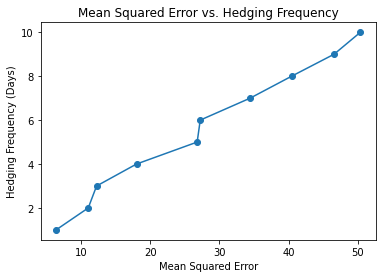

In [31]:
testing_multiple_hedging_frequencies(data, data_call, data_put)

In [48]:
# Impact of changing time to maturity on the accuracy of Delta Hedging 
# Fixed variables: Hedging every day, ATM call price

def testing_multiple_time_to_maturity(all_options, call_options, put_options):
    mean_errors = []
    # Testing time to maturity 10, 20, ..., 60
    iteration_time_to_maturities = np.arange(10, 41, 5)

    for iteration_time_to_maturity in iteration_time_to_maturities:
        errors = [] 
        # 10 different expirations date for statistical results
        for iteration_expiration_date in range(10):
            expiration_date = all_options.at[all_options[all_options['Date'] == '2023-11-17'].index[0] - iteration_expiration_date*2, 'Date']
    
            update_greeks_and_T_based_on_expiration_date(expiration_date, call_options, put_options)

            start_date = all_options.at[all_options[all_options['Date'] == expiration_date].index[0] - iteration_time_to_maturity, 'Date']

            atm_call_price = get_atm_call_price(start_date, data_call)

            result = option_portfolio_delta_hedging([['C'+str(int(atm_call_price)), 1, 'buy']], start_date, expiration_date, 1, all_options, call_options, put_options)
            errors.append(result['mean_squered_error'])

        mean_errors.append(np.mean(errors))

    # Plotting
    plt.plot(iteration_time_to_maturities, mean_errors, marker='o')
    plt.xlabel('Time to maturities (Days)')
    plt.ylabel('Mean Squared Error')
    plt.title('Mean Squared Error vs. Time to maturity')
    plt.show()


2 missing data were detected during the hedging.
2 missing data were detected during the hedging.
0 missing data were detected during the hedging.
1 missing data were detected during the hedging.
0 missing data were detected during the hedging.
0 missing data were detected during the hedging.
0 missing data were detected during the hedging.
0 missing data were detected during the hedging.
0 missing data were detected during the hedging.
0 missing data were detected during the hedging.
5 missing data were detected during the hedging.
2 missing data were detected during the hedging.
1 missing data were detected during the hedging.
1 missing data were detected during the hedging.
0 missing data were detected during the hedging.
0 missing data were detected during the hedging.
0 missing data were detected during the hedging.
0 missing data were detected during the hedging.
0 missing data were detected during the hedging.
0 missing data were detected during the hedging.
5 missing data were 

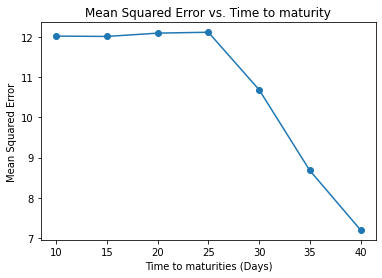

In [49]:
testing_multiple_time_to_maturity(data, data_call, data_put)

In [42]:
# Impact of changing Strike prices on the accuracy of Delta Hedging 
# Fixed variables: Time to maturity = 45 days, Hedging every day

def testing_multiple_strike_prices(all_options, call_options, put_options):
    mean_errors = np.zeros(5)

    for iteration_expiration_date in range(10):
        expiration_date = all_options.at[all_options[all_options['Date'] == '2023-11-17'].index[0] - iteration_expiration_date*2, 'Date']
        update_greeks_and_T_based_on_expiration_date(expiration_date, call_options, put_options)
        start_date = all_options.at[all_options[all_options['Date'] == expiration_date].index[0] - 45, 'Date']

        atm_call_price = get_atm_call_price(start_date, data_call)

        prices = [atm_call_price-10, atm_call_price-5, atm_call_price, atm_call_price+5, atm_call_price+10]
        counter = 0
        for price in prices:
            result = option_portfolio_delta_hedging([['C'+str(int(price)), 1, 'buy']], start_date, expiration_date, 1, all_options, call_options, put_options)
            mean_errors[counter] += result['mean_squered_error']
            counter += 1

    mean_errors = (mean_errors / 10.0)

    # Plotting
    legend = ['ATM - 10', 'ATM - 5', 'ATM', 'ATM + 5', 'ATM + 10']
    plt.plot(legend, mean_errors, marker='o')
    plt.xlabel('Strike price')
    plt.ylabel('Mean Squared Error')
    plt.title('Mean Squared Error vs. Call price')
    plt.show()


6 missing data were detected during the hedging.
6 missing data were detected during the hedging.
5 missing data were detected during the hedging.
5 missing data were detected during the hedging.
4 missing data were detected during the hedging.


C:\Users\ayman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pyfinance\options.py:152: RuntimeWarning: invalid value encountered in sqrt
  ) / (self.sigma * np.sqrt(self.T))
C:\Users\ayman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pyfinance\options.py:153: RuntimeWarning: invalid value encountered in sqrt
  self.d2 = self.d1 - self.sigma * np.sqrt(self.T)
C:\Users\ayman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pyfinance\options.py:229: RuntimeWarning: invalid value encountered in sqrt
  vol = np.sqrt(2.0 * np.pi / self.T) * (value / self.S0)
C:\Users\ayman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pyfinance\options.py:189: RuntimeWarning: invalid value encountered in sqrt
  

3 missing data were detected during the hedging.
3 missing data were detected during the hedging.
2 missing data were detected during the hedging.
8 missing data were detected during the hedging.
14 missing data were detected during the hedging.


C:\Users\ayman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pyfinance\options.py:242: RuntimeWarning: divide by zero encountered in scalar divide
  vol = vol + diff / opt.vega()
C:\Users\ayman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pyfinance\options.py:149: RuntimeWarning: invalid value encountered in scalar divide
  self.d1 = (


1 missing data were detected during the hedging.
1 missing data were detected during the hedging.
0 missing data were detected during the hedging.
7 missing data were detected during the hedging.
13 missing data were detected during the hedging.
2 missing data were detected during the hedging.
1 missing data were detected during the hedging.
1 missing data were detected during the hedging.
0 missing data were detected during the hedging.
6 missing data were detected during the hedging.
1 missing data were detected during the hedging.
0 missing data were detected during the hedging.
0 missing data were detected during the hedging.
0 missing data were detected during the hedging.
6 missing data were detected during the hedging.


C:\Users\ayman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pyfinance\options.py:151: RuntimeWarning: overflow encountered in scalar power
  + (self.r + 0.5 * self.sigma ** 2) * self.T


0 missing data were detected during the hedging.
1 missing data were detected during the hedging.
0 missing data were detected during the hedging.
0 missing data were detected during the hedging.
0 missing data were detected during the hedging.
0 missing data were detected during the hedging.
0 missing data were detected during the hedging.
0 missing data were detected during the hedging.
0 missing data were detected during the hedging.
0 missing data were detected during the hedging.
0 missing data were detected during the hedging.
0 missing data were detected during the hedging.
0 missing data were detected during the hedging.
0 missing data were detected during the hedging.
0 missing data were detected during the hedging.
0 missing data were detected during the hedging.
0 missing data were detected during the hedging.
0 missing data were detected during the hedging.
0 missing data were detected during the hedging.
0 missing data were detected during the hedging.
0 missing data were 

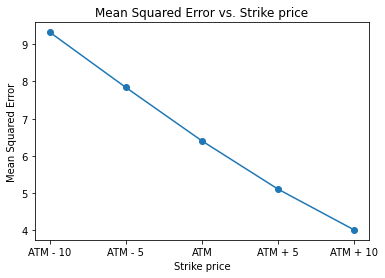

In [43]:
testing_multiple_strike_prices(data, data_call, data_put)